# Bank Credit Predictor: Full-Stack Data Science Application

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pickle

In [40]:
data = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Data preprocessing & cleaning

In [42]:
data.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [43]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [44]:
data.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [45]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [46]:
cat_data = []
num_data = []
for i,c in enumerate(data.dtypes):
    if c == object :
        cat_data.append(data.iloc[:,i])
    else:
        num_data.append(data.iloc[:,i])
cat_data = pd.DataFrame(cat_data).T
num_data = pd.DataFrame(num_data).T

In [47]:
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [48]:
num_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,NaN,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0
610,4106.0,0.0,40.0,180.0,1.0
611,8072.0,240.0,253.0,360.0,1.0
612,7583.0,0.0,187.0,360.0,1.0


In [49]:
# Pour les variable cat on vas les remplacer par les val qui se repete le plus
cat_data = cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any()

False

In [50]:
# Pour les variable num on vas les remplacer par la valeurs précedente de la meme colonne 
num_data.fillna(method='bfill', inplace=True)
num_data.isnull().sum().any()

False

In [51]:
# transformer la colonne target
target_value = {'Y':1, 'N':0}
target = cat_data['Loan_Status']
cat_data.drop('Loan_Status', axis=1, inplace=True)
target = target.map(target_value)
target

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [52]:
# transformer les val cat en numérique
le = LabelEncoder()
for i in cat_data:
    cat_data[i]= le.fit_transform(cat_data[i])
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0,1,0,0,0,0,2
1,1,1,1,1,0,0,0
2,2,1,1,0,0,1,2
3,3,1,1,0,1,0,2
4,4,1,0,0,0,0,2
...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,0
610,610,1,1,3,0,0,0
611,611,1,1,1,0,0,2
612,612,1,1,2,0,0,2


In [53]:
cat_data.drop('Loan_ID', axis=1, inplace=True)
cat_data

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,1,0,0,0,0,2
1,1,1,1,0,0,0
2,1,1,0,0,1,2
3,1,1,0,1,0,2
4,1,0,0,0,0,2
...,...,...,...,...,...,...
609,0,0,0,0,0,0
610,1,1,3,0,0,0
611,1,1,1,0,0,2
612,1,1,2,0,0,2


In [54]:
# concatener cat_data et num_data 
X = pd.concat([cat_data,num_data], axis=1)
y = target

In [55]:
X

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,2,5849.0,0.0,128.0,360.0,1.0
1,1,1,1,0,0,0,4583.0,1508.0,128.0,360.0,1.0
2,1,1,0,0,1,2,3000.0,0.0,66.0,360.0,1.0
3,1,1,0,1,0,2,2583.0,2358.0,120.0,360.0,1.0
4,1,0,0,0,0,2,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,2900.0,0.0,71.0,360.0,1.0
610,1,1,3,0,0,0,4106.0,0.0,40.0,180.0,1.0
611,1,1,1,0,0,2,8072.0,240.0,253.0,360.0,1.0
612,1,1,2,0,0,2,7583.0,0.0,187.0,360.0,1.0


# Analyse exploratoire EDA 

In [56]:
y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [57]:
df = pd.concat([cat_data, num_data, y], axis=1)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

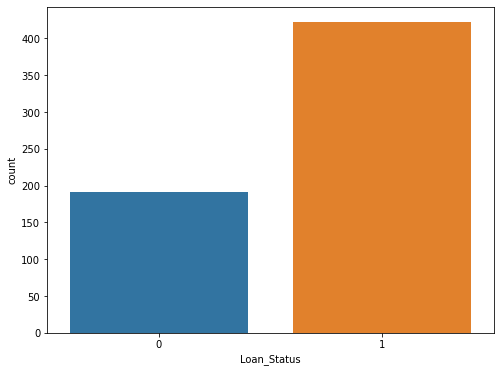

In [58]:
plt.figure(figsize=(8,6))
sns.countplot(y)

In [59]:
#y.value_counts().plot.pie()

68.72963905334473
31.270357966423035


([<matplotlib.patches.Wedge at 0x1dda5a6d6d0>,
 [Text(-0.6105420895241798, 0.9150072988339757, '1'),
  Text(0.6105420038550106, -0.9150073559970479, '0')],
 [Text(-0.33302295792227987, 0.4990948902730776, '68.73%\n(422)'),
  Text(0.3330229111936421, -0.49909492145293516, '31.27%\n(192)')])

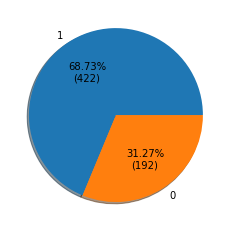

In [60]:
def my_fmt(x):
    print(x)
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)
v_counts = y.value_counts()
total = len(y)
fig = plt.figure()
plt.pie(v_counts, labels=v_counts.index, autopct=my_fmt, shadow=True)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


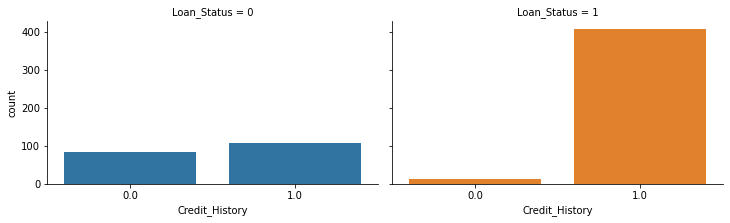

In [61]:
grid = sns.FacetGrid(df, col='Loan_Status', size=3.2, aspect=1.6, hue='Loan_Status' )
grid.map(sns.countplot, 'Credit_History')

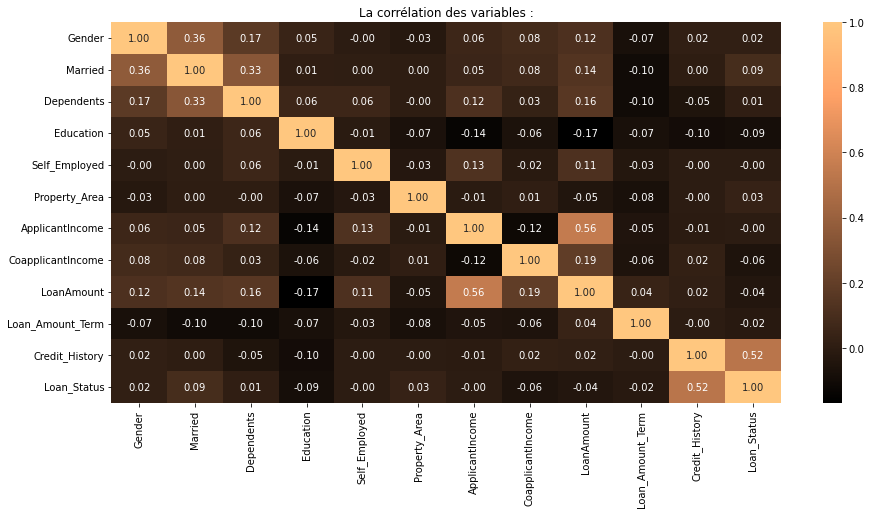

In [62]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), cmap="copper", annot = True, fmt='.2f')
plt.title('La corrélation des variables :')
plt.show()

In [63]:
#diviser la base de donnée
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=12)
for train, test in sss.split(X,y):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    
print('X_train taille : ', X_train.shape)
print('y_train taille : ', y_train.shape)
print('X_test taille : ', X_test.shape)
print('X_test taille : ', y_test.shape)

X_train taille :  (491, 11)
y_train taille :  (491,)
X_test taille :  (123, 11)
X_test taille :  (123,)


In [64]:
# creation de model
models = {
    'LogisticRegression': LogisticRegression(random_state=12),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1, random_state=12)
}

# la fonction de précision
def accu(y_true,y_pred):
    acc = accuracy_score(y_true, y_pred)
    print(f'la precision du modèle est : {acc}')
        
# la fonction d'application 
def train_test_eval(models,X_train, X_test,y_train,y_test):
    for name,model in models.items():
        print(name, ':')
        model.fit(X_train, y_train)
        accu(y_test, model.predict(X_test))
        print('-'*50)
        
train_test_eval(models,X_train, X_test,y_train,y_test)

LogisticRegression :
la precision du modèle est : 0.7723577235772358
--------------------------------------------------
KNeighborsClassifier :
la precision du modèle est : 0.6504065040650406
--------------------------------------------------
DecisionTreeClassifier :
la precision du modèle est : 0.7723577235772358
--------------------------------------------------


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [81]:
X_app = X[['Gender','Married','CoapplicantIncome','Credit_History']]

In [77]:
sss_app = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=12)
for train, test in sss_app.split(X_app,y):
    X_train, X_test = X_app.iloc[train], X_app.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    
print('X_train taille : ', X_train.shape)
print('y_train taille : ', y_train.shape)
print('X_test taille : ', X_test.shape)
print('X_test taille : ', y_test.shape)

X_train taille :  (491, 4)
y_train taille :  (491,)
X_test taille :  (123, 4)
X_test taille :  (123,)


In [78]:
train_test_eval(models,X_train, X_test,y_train,y_test)

LogisticRegression :
la precision du modèle est : 0.7804878048780488
--------------------------------------------------
KNeighborsClassifier :
la precision du modèle est : 0.6666666666666666
--------------------------------------------------
DecisionTreeClassifier :
la precision du modèle est : 0.7723577235772358
--------------------------------------------------


In [79]:
model_logistic = LogisticRegression()
model_logistic.fit(X_app,y)

LogisticRegression()

In [80]:
pickle.dump(model_logistic, open('model4.pkl','wb'))